In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rxr

In [2]:
pet_frame = xr.open_dataset("/home/zyzh0/coding/risk_evaluation/scripts/datas/MODIS/MODIS16A2GF/PET/MOD16A2GF.006_PET_500m_doy2000001_aid0001.tif")

In [3]:
pet_frame

<xarray.Dataset>
Dimensions:      (band: 1, x: 3121, y: 3601)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 110.0 110.0 110.0 110.0 ... 123.0 123.0 123.0 123.0
  * y            (y) float64 43.0 43.0 42.99 42.99 ... 28.01 28.01 28.01 28.0
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...

In [4]:
gpdframe = gpd.read_file('/home/zyzh0/coding/risk_evaluation/scripts/datas/BOARDER/extracted/华北平原地市级/华北平原地市级.shp')

In [5]:
gpd_dissolved=gpdframe.dissolve()

In [6]:
gpd_dissolved

,geometry,OBJECTID,省,省代码,市,市代码,市类型,省类型,面积,Shape_Leng,Shape_Area
0,"MULTIPOLYGON (((116.71529 30.05644, 116.70969 ...",1,安徽省,340000,安庆市,340800,地级市,省,13488.8,6.308934,1.268428


In [7]:
gpd_dissolved=gpd_dissolved.drop(columns=["省","省代码","市","市代码","市类型","省类型","面积"])

In [8]:
gpd_dissolved.to_file("area.shp",crs=gpdframe.crs)

In [9]:
dem_frame = xr.open_dataset("/home/zyzh0/coding/risk_evaluation/scripts/outputs/DEM-90/DEM_SRTM.nc")

In [10]:
dem_frame.rio.write_crs("EPSG:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (y: 1800, x: 1560)
Coordinates:
  * y            (y) float64 43.18 43.17 43.16 43.16 ... 28.03 28.02 28.01 28.0
  * x            (x) float64 110.0 110.0 110.0 110.0 ... 123.0 123.0 123.0 123.0
    spatial_ref  int64 0
Data variables:
    band_data    (y, x) float32 ...

In [11]:
dem_frame = dem_frame.rio.clip(gpd_dissolved.geometry.values,crs=gpd_dissolved.crs,drop=True)

/home/zyzh0/miniconda3/envs/gis/lib/python3.10/site-packages/rioxarray/raster_writer.py:130: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


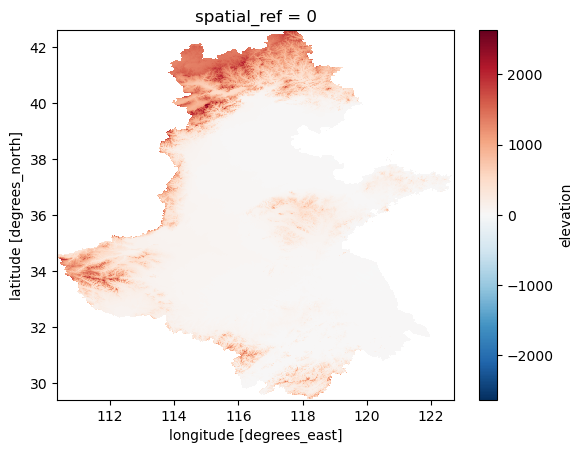

In [12]:
dem_frame.band_data.plot()

In [13]:
dem_array=dem_frame.band_data.to_numpy()

In [14]:
dem_array=dem_array.flatten()

In [15]:
dem_array.sort()

In [16]:
dem_array

array([-6., -3., -3., ..., nan, nan, nan], dtype=float32)

Text(0, 0.5, 'Chuncks')

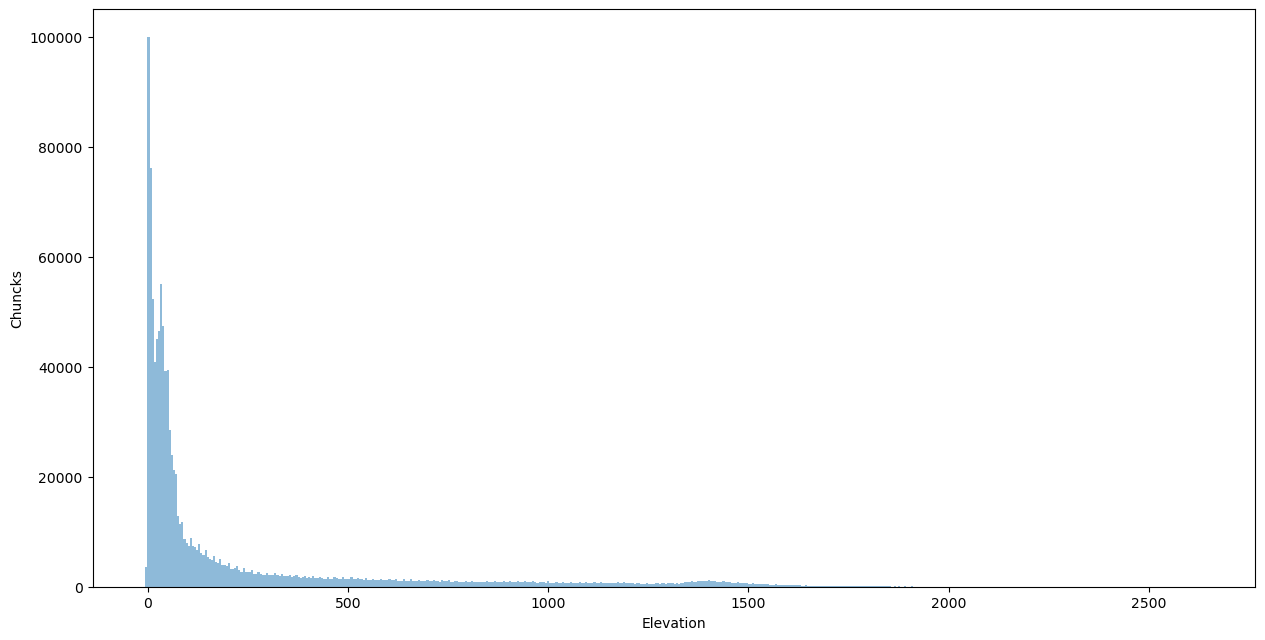

In [17]:
fig,ax = plt.subplots(figsize=(15,7.5))
ax.hist(dem_array,bins=500,density=False,histtype="barstacked",alpha=0.5)
ax.set_xlabel("Elevation")
ax.set_ylabel("Chuncks")

In [18]:
print("max:",np.nanmax(dem_array),"min:",np.nanmin(dem_array),"mean:",np.nanmean(dem_array),"median:",np.nanmedian(dem_array),"std:",np.nanstd(dem_array))

max: 2633.0 min: -6.0 mean: 238.86658 median: 54.0 std: 386.60248


In [19]:
precip_frame = xr.open_dataset("/home/zyzh0/coding/risk_evaluation/scripts/outputs/PRECIP/pre_2015_2017.nc")

In [20]:
precip_frame = precip_frame.rio.clip(gpd_dissolved.geometry.values,crs=gpd_dissolved.crs,drop=True)

In [21]:
precip_frame

<xarray.Dataset>
Dimensions:      (lat: 1587, lon: 1483, time: 36)
Coordinates:
  * lat          (lat) float64 42.61 42.6 42.6 42.59 ... 29.42 29.41 29.4 29.4
  * lon          (lon) float64 110.4 110.4 110.4 110.4 ... 122.7 122.7 122.7
  * time         (time) float64 1.0 2.0 3.0 4.0 5.0 ... 32.0 33.0 34.0 35.0 36.0
    spatial_ref  int64 0
Data variables:
    pre          (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan

In [22]:
precip_array_7=precip_frame[dict(time=6)].pre.to_numpy()

In [23]:
precip_array_8=precip_frame[dict(time=7)].pre.to_numpy()

In [24]:
print("2015.7\n","max:",np.nanmax(precip_array_7),"min:",np.nanmin(precip_array_7),"mean:",np.nanmean(precip_array_7),"median:",np.nanmedian(precip_array_7),"std:",np.nanstd(precip_array_7))

2015.7
 max: 5403.0 min: 559.0 mean: 1458.325 median: 1150.0 std: 720.7099


In [25]:
print("2015.8\n","max:",np.nanmax(precip_array_8),"min:",np.nanmin(precip_array_8),"mean:",np.nanmean(precip_array_8),"median:",np.nanmedian(precip_array_8),"std:",np.nanstd(precip_array_8))

2015.8
 max: 3416.0 min: 343.0 mean: 1425.5504 median: 1477.0 std: 357.5512
